In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
import numpy as np

seed = 101 # Lucky seed
np.random.seed(seed)
plt.style.use('ggplot')

In [2]:
def target_0(x):
    return x*np.sin(x)

def target_1(x):
    return np.piecewise(x.ravel(), [x.ravel()<2, x.ravel()>=2], [lambda t: 2, lambda t: t])

def target_2(x):
    return 2.7*np.log(x + 3)

def plot_gp_ax(x, y, x_sample, y_sample, ax, kernel=kernels.RBF(), title=''):
    gp = GaussianProcessRegressor(kernel, random_state=seed).fit(x_sample, y_sample)
    mu, sigma = gp.predict(x, return_std=True)
    
    ax.plot(x, y, color='black', lw=2, label='Target')
    ax.plot(x, mu, color='steelblue', ls='dashed', lw=2, label='Mean Prediction')
    ax.fill_between(x.ravel(), mu.ravel()-1.96*sigma, mu.ravel()+1.96*sigma, color='steelblue', alpha=0.5, label='95% Confidence Interval')
    ax.scatter(x_sample, y_sample, marker='o', color='red', lw=1, s=50, alpha=1, label='Samples: %d' % x_sample.shape[0])
    ax.set_title(title)
    return ax

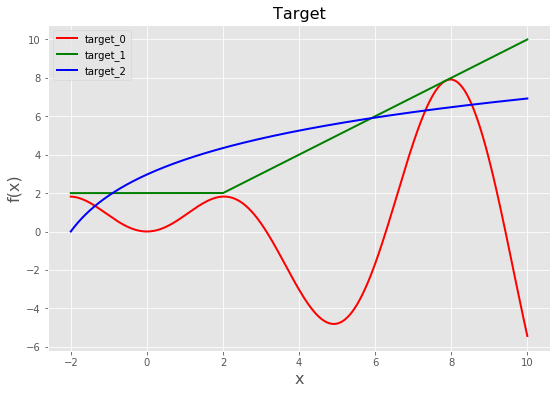

In [3]:
x = np.linspace(-2, 10, 10000).reshape(-1,1)
y_0 = target_0(x)
y_1 = target_1(x)
y_2 = target_2(x)

plt.figure(figsize=(9,6))
plt.plot(x, y_0, lw=2, color='red', label='target_0')
plt.plot(x, y_1, lw=2, color='green', label='target_1')
plt.plot(x, y_2, lw=2, color='blue', label='target_2')
plt.title('Target', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.legend(loc='best')
plt.show()

In [8]:
x_sample = np.random.uniform(-2, 10, size=5).reshape(-1,1)
y_sample_0 = target_0(x_sample)
y_sample_1 = target_1(x_sample)
y_sample_2 = target_2(x_sample)

C:\Users\King\Anaconda3\envs\bayes_opt\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


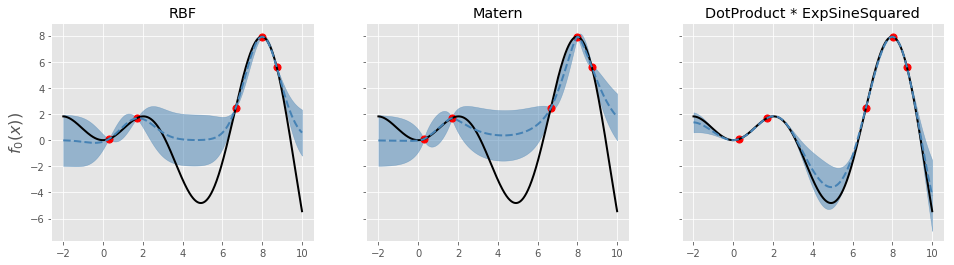

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,4))
ax[0] = plot_gp_ax(x, y_0, x_sample, y_sample_0, ax[0], kernel=kernels.RBF(), title='RBF')
ax[0].set_ylabel('$f_0(x)$', fontsize=16)
ax[1] = plot_gp_ax(x, y_0, x_sample, y_sample_0, ax[1], kernel=kernels.Matern(nu=1), title='Matern')
ax[2] = plot_gp_ax(x, y_0, x_sample, y_sample_0, ax[2], kernel=kernels.Product(kernels.DotProduct(), kernels.ExpSineSquared(length_scale=np.pi)), title='DotProduct * ExpSineSquared')
plt.show()

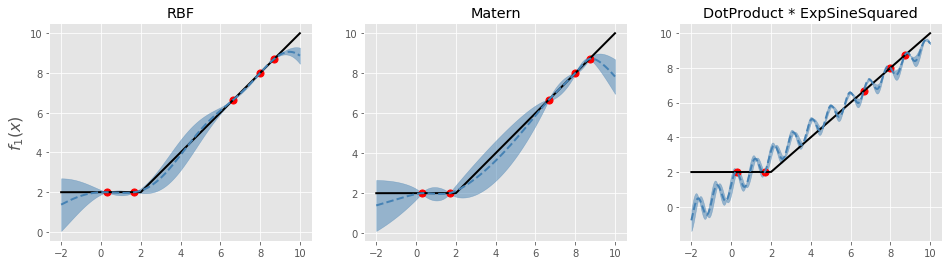

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,4))
ax[0] = plot_gp_ax(x, y_1, x_sample, y_sample_1, ax[0], kernel=kernels.RBF(), title='RBF')
ax[0].set_ylabel('$f_1(x)$', fontsize=16)
ax[1] = plot_gp_ax(x, y_1, x_sample, y_sample_1, ax[1], kernel=kernels.Matern(nu=1), title='Matern')
ax[2] = plot_gp_ax(x, y_1, x_sample, y_sample_1, ax[2], kernel=kernels.Product(kernels.DotProduct(), kernels.ExpSineSquared(length_scale=np.pi)), title='DotProduct * ExpSineSquared')
plt.show()

C:\Users\King\Anaconda3\envs\bayes_opt\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


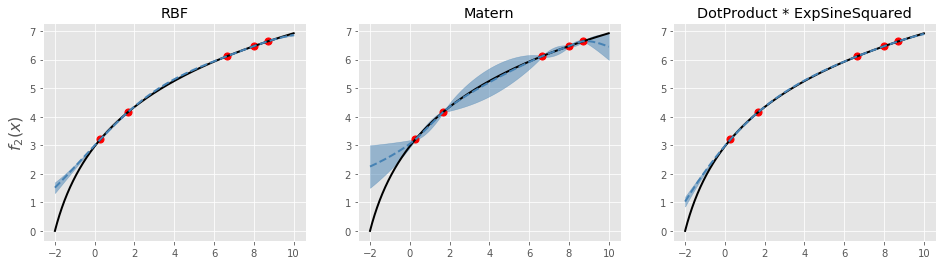

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,4))
ax[0] = plot_gp_ax(x, y_2, x_sample, y_sample_2, ax[0], kernel=kernels.RBF(), title='RBF')
ax[0].set_ylabel('$f_2(x)$', fontsize=16)
ax[1] = plot_gp_ax(x, y_2, x_sample, y_sample_2, ax[1], kernel=kernels.Matern(nu=1), title='Matern')
ax[2] = plot_gp_ax(x, y_2, x_sample, y_sample_2, ax[2], kernel=kernels.Product(kernels.DotProduct(), kernels.ExpSineSquared(length_scale=np.pi)), title='DotProduct * ExpSineSquared')
plt.show()

In [20]:
ax[0][0]

C:\Users\King\Anaconda3\envs\bayes_opt\lib\site-packages\sklearn\gaussian_process\gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


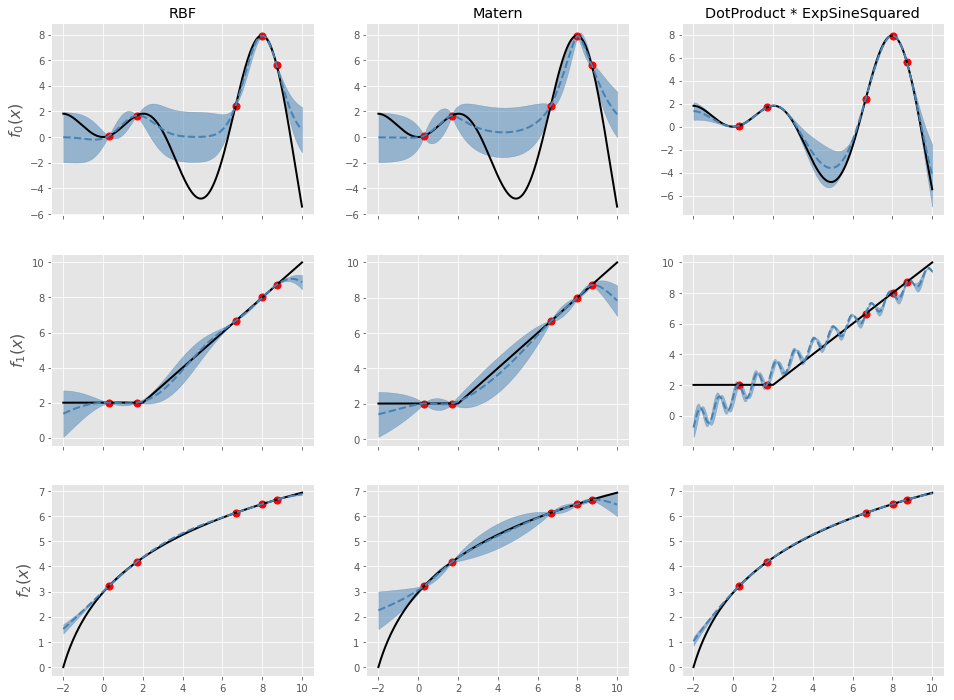

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=False, figsize=(16,12))
ax[0][0] = plot_gp_ax(x, y_0, x_sample, y_sample_0, ax[0][0], kernel=kernels.RBF(), title='RBF')
ax[0][0].set_ylabel('$f_0(x)$', fontsize=16)
ax[0][1] = plot_gp_ax(x, y_0, x_sample, y_sample_0, ax[0][1], kernel=kernels.Matern(nu=1), title='Matern')
ax[0][2] = plot_gp_ax(x, y_0, x_sample, y_sample_0, ax[0][2], kernel=kernels.Product(kernels.DotProduct(), kernels.ExpSineSquared(length_scale=np.pi)), title='DotProduct * ExpSineSquared')

ax[1][0] = plot_gp_ax(x, y_1, x_sample, y_sample_1, ax[1][0], kernel=kernels.RBF(), title='')
ax[1][0].set_ylabel('$f_1(x)$', fontsize=16)
ax[1][1] = plot_gp_ax(x, y_1, x_sample, y_sample_1, ax[1][1], kernel=kernels.Matern(nu=1), title='')
ax[1][2] = plot_gp_ax(x, y_1, x_sample, y_sample_1, ax[1][2], kernel=kernels.Product(kernels.DotProduct(), kernels.ExpSineSquared(length_scale=np.pi)), title='')

ax[2][0] = plot_gp_ax(x, y_2, x_sample, y_sample_2, ax[2][0], kernel=kernels.RBF(), title='')
ax[2][0].set_ylabel('$f_2(x)$', fontsize=16)
ax[2][1] = plot_gp_ax(x, y_2, x_sample, y_sample_2, ax[2][1], kernel=kernels.Matern(nu=1), title='')
ax[2][2] = plot_gp_ax(x, y_2, x_sample, y_sample_2, ax[2][2], kernel=kernels.Product(kernels.DotProduct(), kernels.ExpSineSquared(length_scale=np.pi)), title='')

plt.show()